Inspiré par l'exellent livre de Sebastian Raschka (@rasbt) : [Python Machine learning](http://www.amazon.fr/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130/ref=sr_1_1?ie=UTF8&qid=1456765399&sr=8-1&keywords=python+machine+learning) et [Notebook](https://github.com/rasbt/python-machine-learning-book) ainsi que par les tuto de [Scikit Learn sur Kaggle](http://blog.kaggle.com/tag/scikit-learn-tutorial-series/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

/Users/babou/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Numérique : 

## Log transformation log(x) / log(1 + x)

Graphiques représentant le nombre de retraité et le nombre de vote FN par ville durant le second tour des elections régionales (lien [github](https://github.com/armgilles/regionnales2015)).

- A gauche : pas de log
- A droit : log

On observe une meilleure distribution des données si celle-ci sont transformées 

![caption](log_transf.png)

## Normalisation

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df.columns = ["label", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
                "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines",
                "Proline"]
df.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df[['Alcohol', 'Malic acid']].describe()

,Alcohol,Malic acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


La feature "Alcohol" (%/vol) et "Malic acid" (g/l) n'ont pas les mêmes échelles. On compare donc des choux et des carottes...

/Users/babou/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


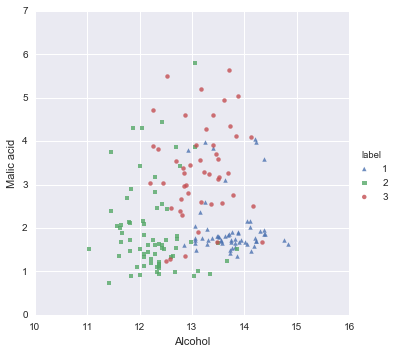

In [4]:
sns.lmplot(x="Alcohol", y="Malic acid", hue="label", data=df, fit_reg=False, markers=['^', 's', 'o'])

In [5]:
# On normalise les features
from sklearn.preprocessing import  StandardScaler

df_scale = df.copy()

for col in df_scale.columns[1:]:
    scaler = StandardScaler()
    df_scale[col] = scaler.fit_transform(df_scale[col])



/Users/babou/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/babou/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/babou/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [6]:
df_scale[['Alcohol', 'Malic acid']].describe()

,Alcohol,Malic acid
count,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17
std,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00
25%,-7.882448e-01,-6.587486e-01
50%,6.099988e-02,-4.231120e-01
75%,8.361286e-01,6.697929e-01
max,2.259772e+00,3.109192e+00


"alcool" et "acide malique" ont maintenant **une moyenne de 0 et un std de 1**

In [ ]:
sns.lmplot(x="Alcohol", y="Malic acid", hue="label", data=df_scale, fit_reg=False, markers=['^', 's', 'o'])

La normalisation est crucial lors d'un PCA (Principal Component Analysis), observons la différence à l'aide d'un graphique :

In [ ]:
# Using PCA
from sklearn.decomposition import PCA

# X = features, y = label
X, y = df.iloc[:, 1:].values, df.iloc[:,0].values # No scale
X_scale, y = df_scale.iloc[:, 1:].values, df_scale.iloc[:,0].values #scale

# non scale
pca = PCA(n_components=2).fit(X)
data_pca = pca.transform(X)
pca_df = pd.DataFrame(data_pca, columns=['pca_1', 'pca_2'])
pca_df['label'] = df['label']

# scale
pca_scale = PCA(n_components=2).fit(X_scale)
data_pca_scale = pca_scale.transform(X_scale)
pca_scale_df = pd.DataFrame(data_pca_scale, columns=['pca_1', 'pca_2'])
pca_scale_df['label'] = df['label']

Le PCA permet de réduire le nombre dimension tout en gardant le maximum d'information. On extrait en quelques sorte le substrat de l'information. Plus d'info [ici](http://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca) et via cette [vidéo](https://www.youtube.com/watch?v=4pnQd6jnCWk&ab_channel=PauloRicardoGherardiHein)

In [ ]:
pca_df.head()

### PCA non normalisé :

In [ ]:
g=sns.lmplot(x="pca_1", y="pca_2", hue="label", data=pca_df, fit_reg=False, markers=['^', 's', 'o'])

### PCA normalisé

In [ ]:
sns.lmplot(x="pca_1", y="pca_2", hue="label", data=pca_scale_df, fit_reg=False, markers=['^', 's', 'o'])

Dans la verion "PCA normalisé", on retrouve nos 3 clusters assez délimités alors que pour la version "PCA non normalisé", la délimitation est beaucoup chaotique.

# Catégorie

Les features contenant du texte doivent etre transformées afin de nourir l'algorithme par la suite.

In [7]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'prize', 'class label']
df

,color,size,prize,class label
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [8]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['class label'] = LE.fit_transform(df['class label'])

In [9]:
df

,color,size,prize,class label
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


Ensuite se pose la question pour "color" et "size" :
    - "size": Il y a un ordre de grandeur. Il faut donc respecter cette ordre de grandeur avec notre transformation.
    - "color": Suivant le type d'algorythme utilisé, on peux la transformé comme "class label" ou bien la "binariser", c'est à dire que chaque valeur possible sera une colonne (avec des 0 ou 1)

## Ordinal features

In [10]:
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,prize,class label
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


## Nominal features

In [11]:
pd.get_dummies(df)

,size,prize,class label,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


## Bien comprendre les métrics

Pour le **challenge Rossman**, la metric est le Root Mean Square Percentage Error (RMSPE). Compréhension par l'exemple :


In [12]:
# To compute RMSPE
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def RMSPE(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

In [13]:
real_value = np.array([3500, 6400, 5000])   # Les valeurs que je cherche à prédire
prediction_1 = np.array([3000, 5900, 5500]) # assez bonne
prediction_2 = np.array([2510, 4000, 8000]) # pas terrible
prediction_3 = np.array([3400, 6490, 5070]) # exellente

In [14]:
print "1 - Prédiction assez bonne : %s" %(RMSPE(prediction_1, real_value))
print "2 - Mauvaise prédiction : %s" %(RMSPE(prediction_2, real_value))
print "3 - Bonne prédiction : %s" %(RMSPE(prediction_3, real_value))

1 - Prédiction assez bonne : 0.120033446568
2 - Mauvaise prédiction : 0.467687202883
3 - Bonne prédiction : 0.0203959495373


#### Plus la valeur est faible, plus la prédiction est précise.

Pour le **challenge Homesite**, la metric est [Area under the curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) (AUC), elle permet d'étudier la performance d’un classifieur binaire. Elle va de 0 à 1 (1 étant un classicateur parfait)

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [16]:
real_value = np.array([0, 0, 1, 1])   # Les valeurs que je cherche à prédire
prediction_1 = np.array([0.1, 0.4, 0.3, 0.8]) # assez bonne
prediction_2 = np.array([0.55, 0.4, 0.48, 0.35]) # pas terrible
prediction_3 = np.array([0.1, 0.2, 0.8, 0.9]) # exellente

In [17]:
print "1 - Prédiction assez bonne : %s" %(roc_auc_score(real_value, prediction_1))
print "2 - Mauvaise prédiction : %s" %(roc_auc_score(real_value, prediction_2))
print "3 - Bonne prédiction : %s" %(roc_auc_score(real_value, prediction_3))

1 - Prédiction assez bonne : 0.75
2 - Mauvaise prédiction : 0.25
3 - Bonne prédiction : 1.0


Pour aller plus loin graphiquement. N'hésitez pas à modifier les valeurs de "real_value" et des prédiction. Attention "real_value" doit avoir le même nombre de valeurs que les prédictions.

In [18]:
def plot_roc(true_positive_rate, false_positive_rate, roc_auc, title=''):
    """
    To plot ROC curve
    """
    title = 'Receiver Operating Characteristic' + title
    plt.title(title)
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [19]:
# List of all my predicitons
my_list_pred = [prediction_1, prediction_2, prediction_3]
my_predictions = []
for pred in my_list_pred:
    my_predictions.append(pred)

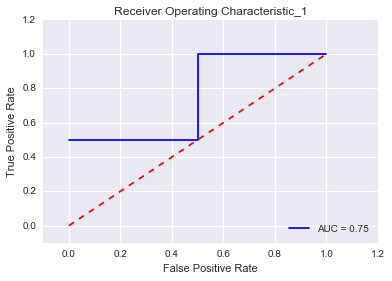

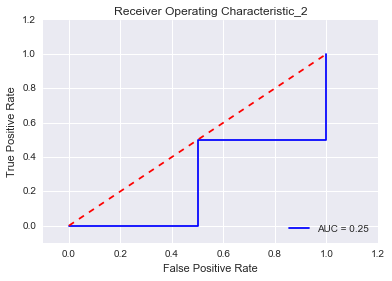

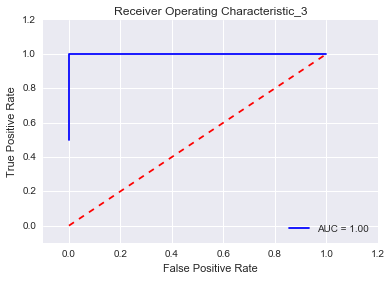

In [20]:
# Plot ROC 

i = 1
for prediction in my_predictions:
    false_positive_rate, true_positive_rate, thresholds = roc_curve(real_value, prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plot_roc(true_positive_rate, false_positive_rate, roc_auc, title='_'+str(i))
    i += 1

## Mesurer le performance de son modèle :

In [56]:
from sklearn.datasets import load_iris
# Get data
iris = load_iris()

# create X (features) and y (target)
X = iris.data
y = iris.target

print "Il y %d de lignes pour X" %(len(X))
print "Il y %d de lignes pour y" %(len(y))
X[0:5]

Il y 150 de lignes pour X
Il y 150 de lignes pour y


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [73]:
from sklearn.cross_validation import train_test_split
# Split le dataset en train (apprentissage) et test (phase de validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=4)   # Hésitez pas à changer le random split

print "Il y %d de lignes pour X_train" %(len(X_train))
print "Il y %d de lignes pour y_train" %(len(y_train))
print "Il y %d de lignes pour X_test" %(len(X_test))
print "Il y %d de lignes pour y_test" %(len(y_test))

Il y 112 de lignes pour X_train
Il y 112 de lignes pour y_train
Il y 38 de lignes pour X_test
Il y 38 de lignes pour y_test


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)              # On entraine le modèle (sur train)
y_pred = knn.predict(X_test)           # On prédit le résultat sur un partie de données inconnu (test)
print accuracy_score(y_test, y_pred)   # On regarde précision du modèle de nos prédiction vers la réalité

0.973684210526


La performance du modèle varie selon le split (random_state). On est beaucoup trop dépendant des éléments présents dans la phase d'apprentissage (train) et dans la validation (test).

On utilisant le principe de Cross Validation, on s'assure que chaque ligne à été en phase d'apprentissage (train) ainsi que dans la phase de validation (test) :

In [75]:
from sklearn.cross_validation import KFold

kf = KFold(25, n_folds=5, shuffle=False)
# print the contents of each training and testing set
print '{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations')
for iteration, data in enumerate(kf, start=1):
    print '{:^9} {} {:^25}'.format(iteration, data[0], data[1])

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


Chaque élément apparait uniquement une fois dans la phase de test

#### Utilisation de Cross Validation

In [76]:
from sklearn.cross_validation import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.93333333  1.          1.          1.        ]


On a donc 10 mesures de performances différentes.

In [78]:
print "La performance moyenne est de : %s et un std de %s" %(np.mean(scores), np.std(scores))

La performance moyenne est de : 0.966666666667 et un std de 0.04472135955


## Changer les paramètres de l'algorythme :

Dans la grande majorité des cas, un algoryhme possèdent plusieurs paramètres. Changer ces paramètres influent sur le résultat :

In [27]:
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Get Data
X, y = iris_data()
X = X[:,[0, 2]]

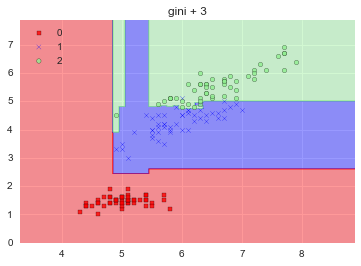

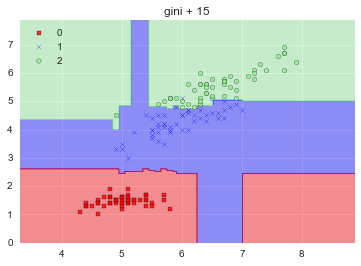

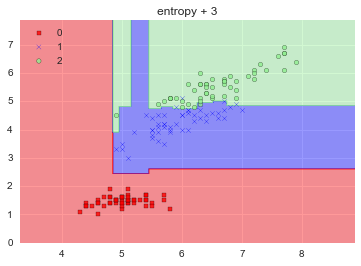

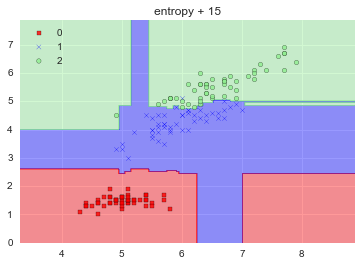

In [33]:
# To plot graph
for criterion in ['gini', 'entropy']:                # Criterion 
    for n_estimators in [3, 15]:                     # You can change this value if you want to play
        RFC = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, random_state=12)
        RFC.fit(X,y)
        title = criterion + " + " + str(n_estimators)
        fig = plot_decision_regions(X=X, y=y, clf=RFC, legend=2)
        plt.title(title)
        plt.show()  
